In [37]:
# importing the libraries
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:

size=256
train_dir='../input/covid19-radiography-database/COVID-19_Radiography_Dataset/'
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
    shear_range=0.1,horizontal_flip=True,vertical_flip=True,rescale=1/255.0,validation_split=0.1,).flow_from_directory(train_dir,batch_size=32,target_size=(size,size),subset="training",shuffle=True)

Found 38098 images belonging to 4 classes.


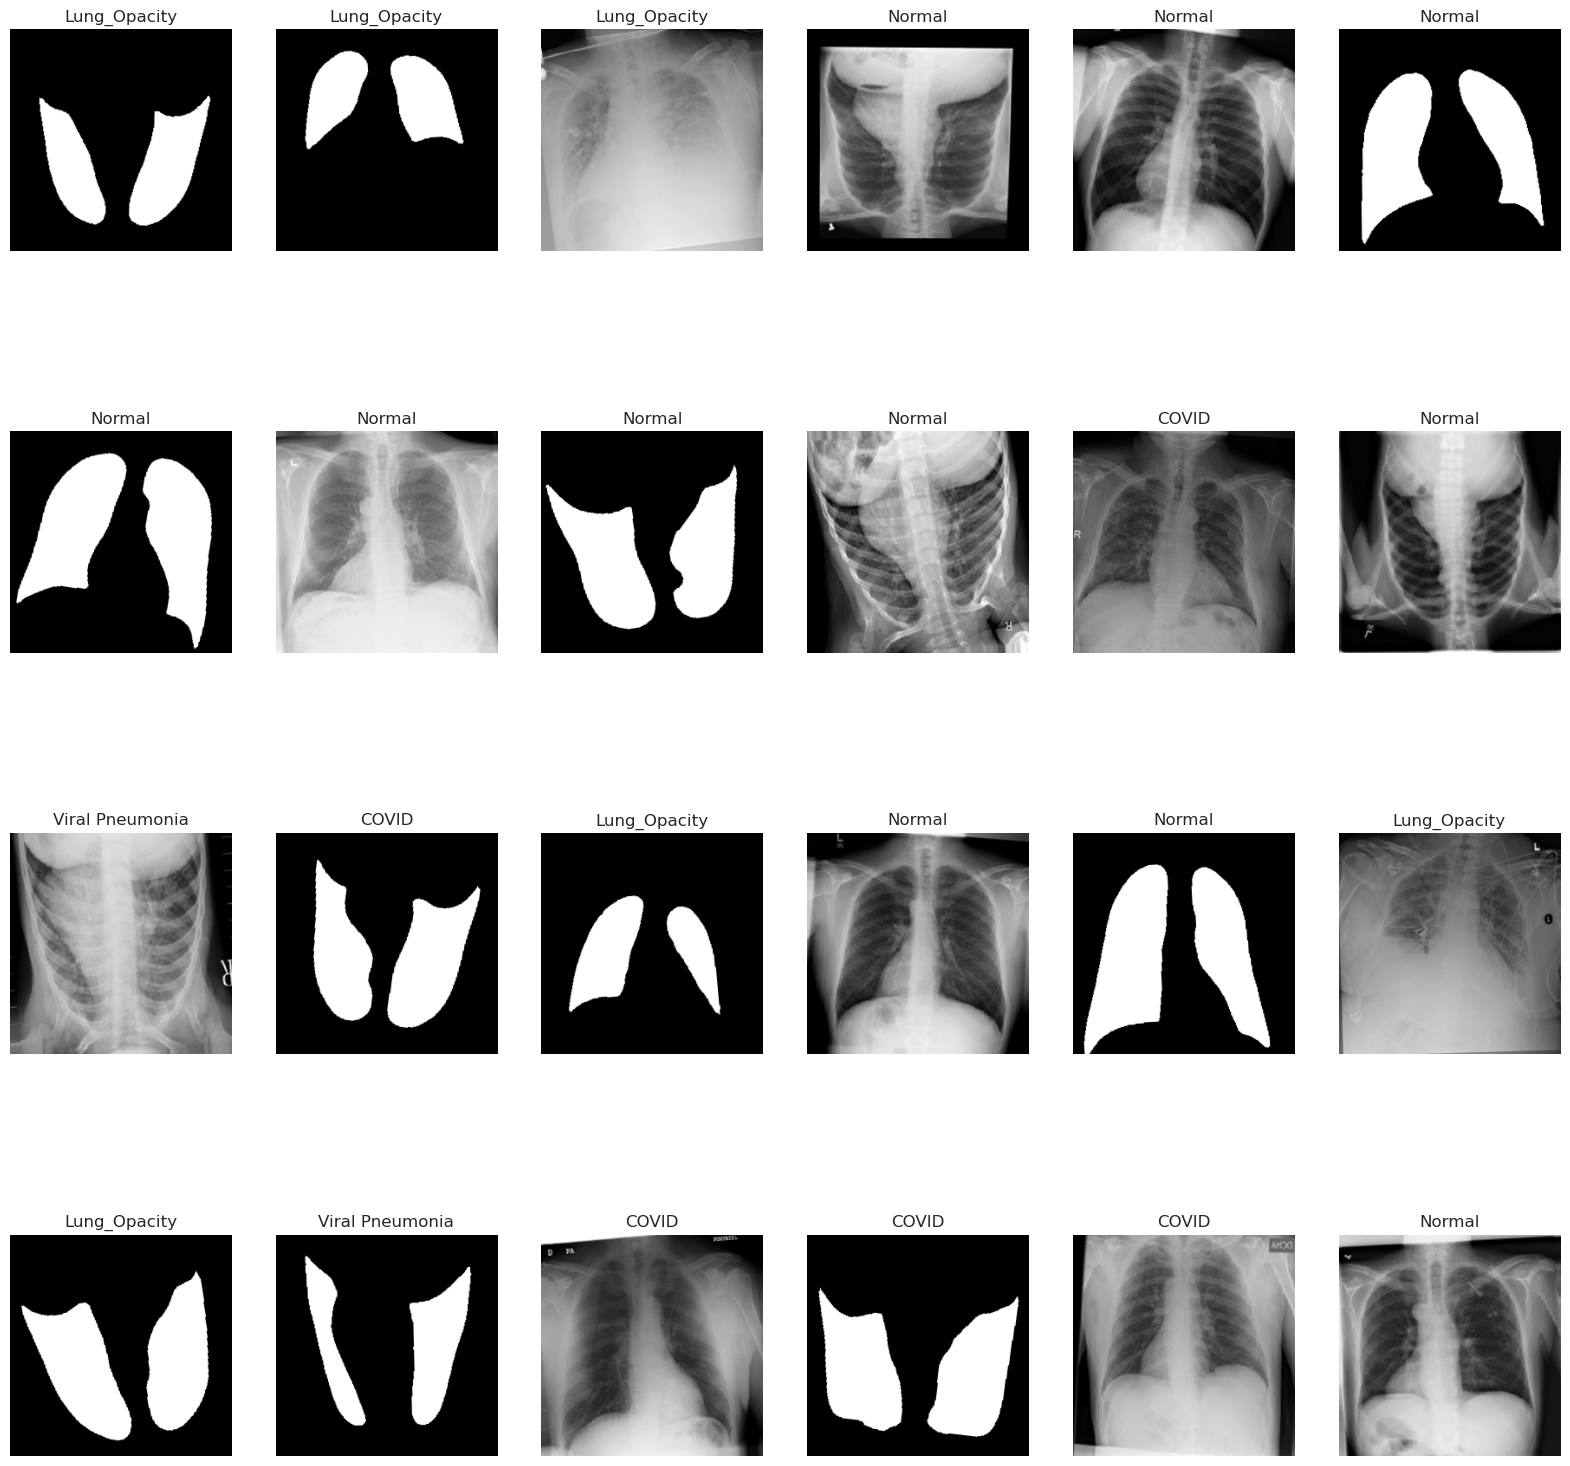

In [23]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,24):
        plt.subplot(4,6,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.axis('off')
    # show the plot
    plt.show()
    break

In [24]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 4232 images belonging to 4 classes.


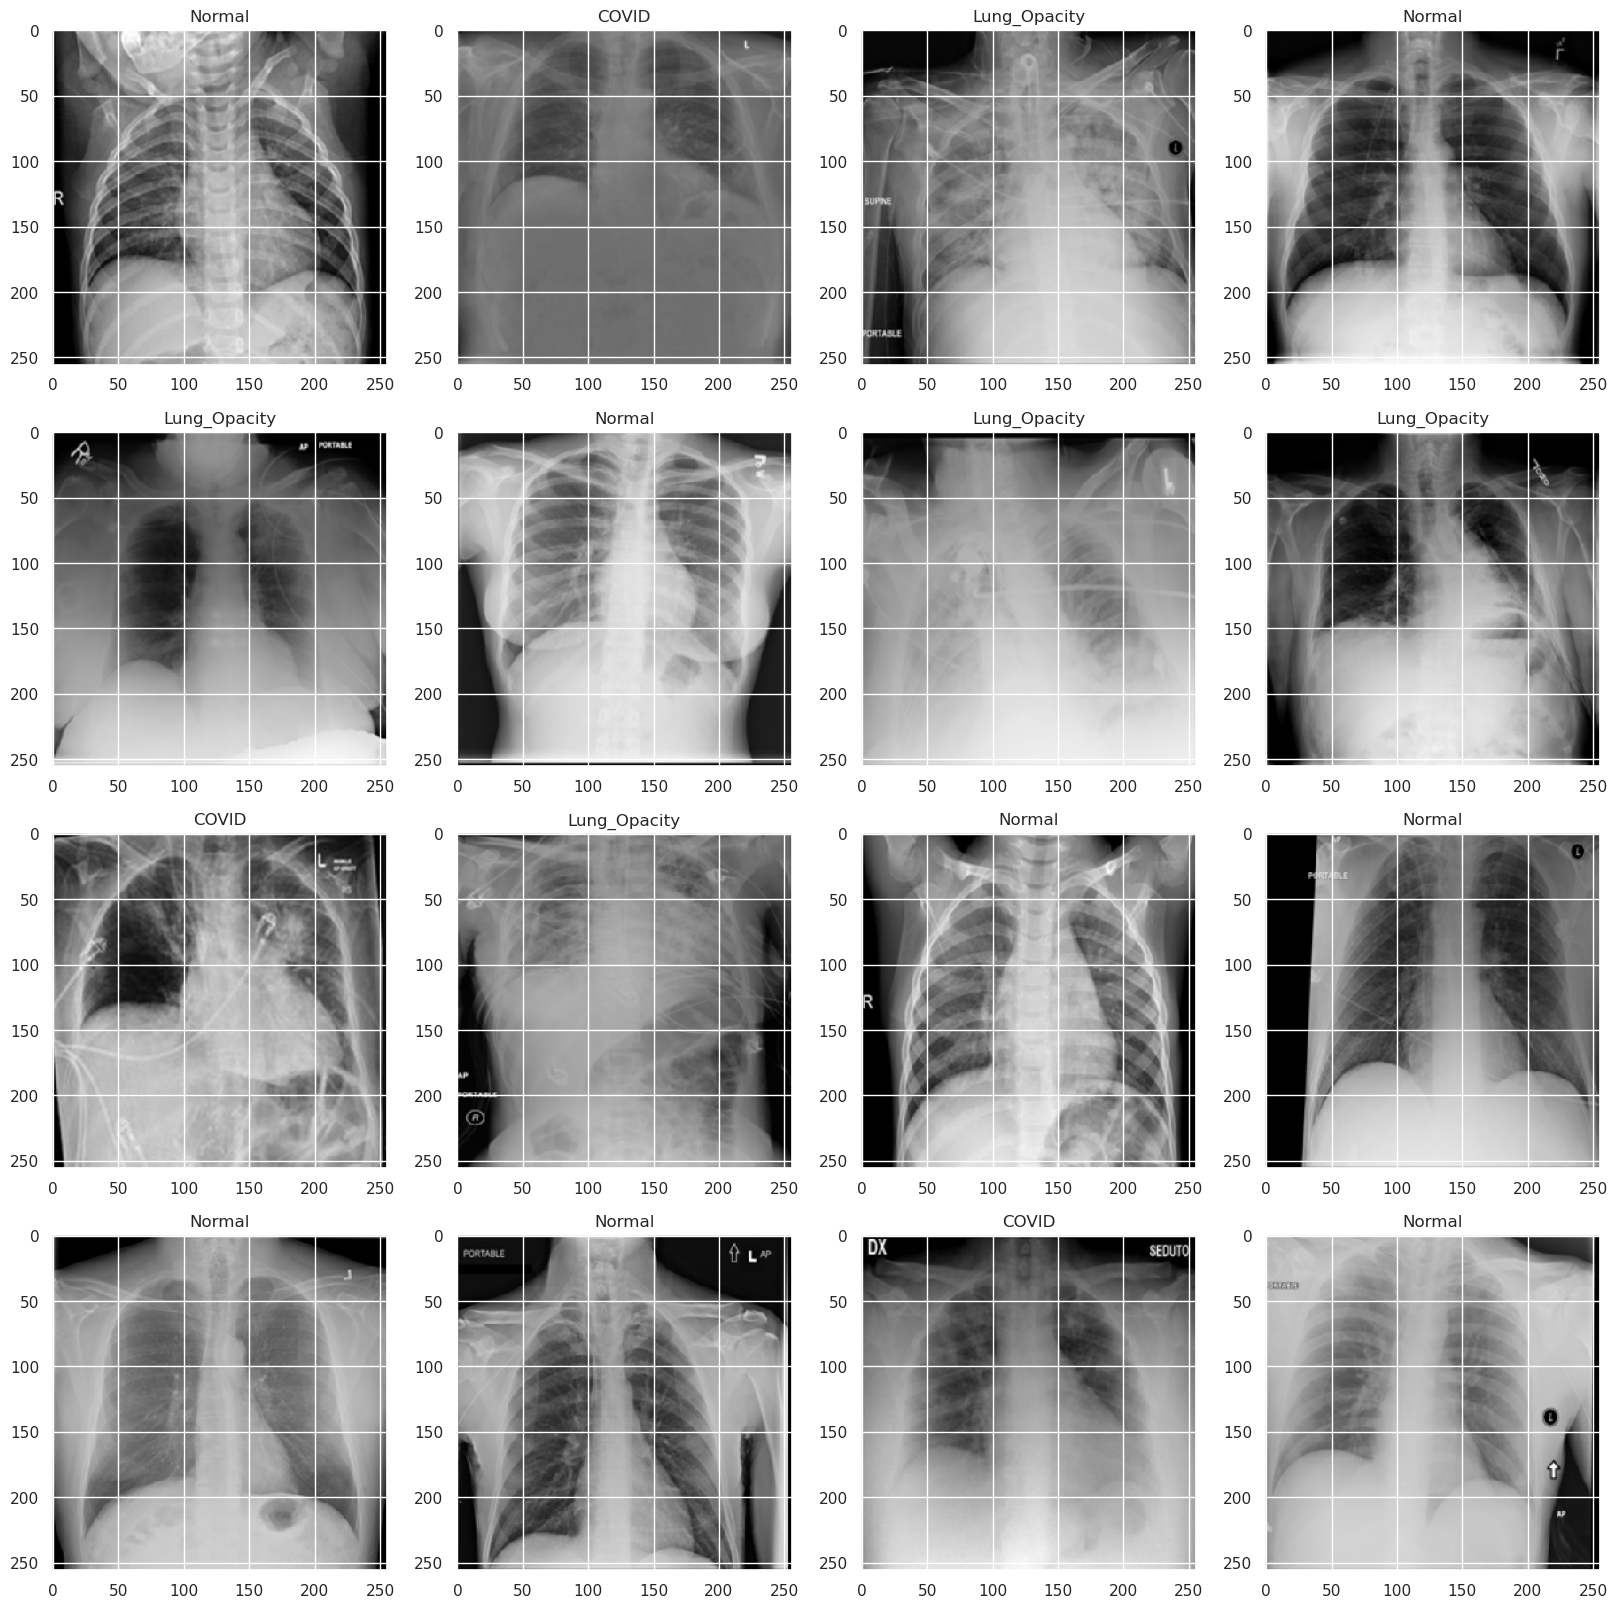

In [25]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [26]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=16,target_size=(size,size),subset='validation',shuffle=True)

Found 4232 images belonging to 4 classes.


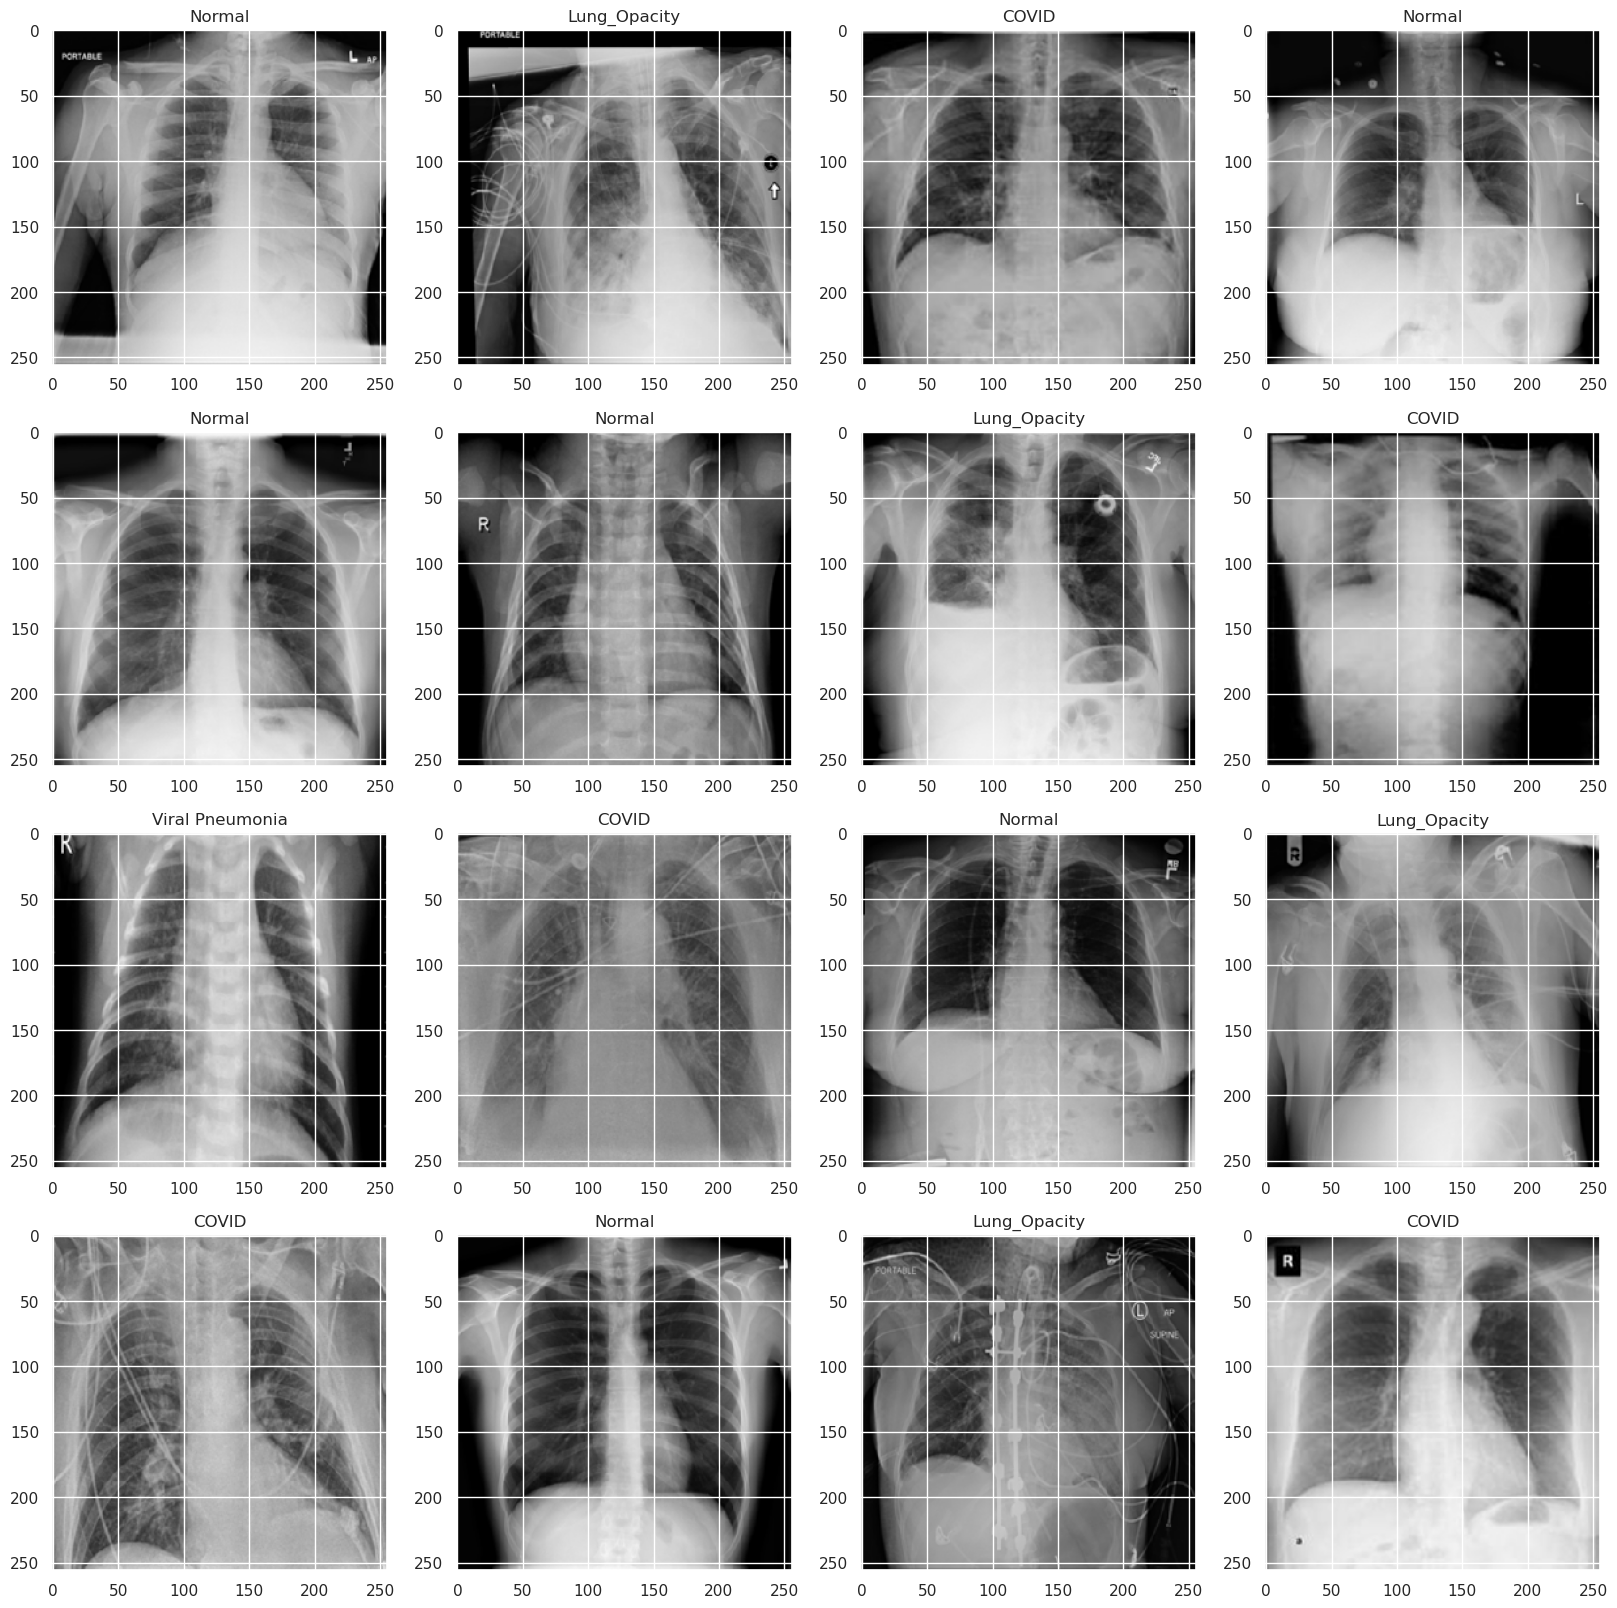

In [27]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [28]:
from keras.models import Sequential , Model ,load_model
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from keras.optimizers import Adam , RMSprop
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [29]:
optimizer_adam=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [30]:
EarlyStop=EarlyStopping(patience=15,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.000001)
model_check=ModelCheckpoint('model.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [38]:
model=Sequential([
                  Conv2D(64,3,activation='relu',kernel_initializer='he_normal',input_shape=(size,size,3),kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  Conv2D(128,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  MaxPooling2D(3),
                  Conv2D(256,3,activation='relu',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  MaxPooling2D(3),
                  Conv2D(512,3,padding='valid',activation='relu'),
                  GlobalMaxPool2D(),
                  Flatten(),
                  Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                  Dense(4,activation='softmax')
                  
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 252, 252, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 84, 84, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 82, 82, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 512)      

In [33]:
model.compile(optimizer=optimizer_adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=100,batch_size=32,
                  steps_per_epoch=len(train_generator)/32,validation_steps=len(valid_generator)/16,
                  callbacks=callback, verbose=1)

Epoch 1/100
37/37 [==============================] - ETA: 0s - loss: 1.6641 - accuracy: 0.4721
Epoch 1: val_loss improved from inf to 1.40455, saving model to model.hdf5
37/37 [==============================] - 29s 769ms/step - loss: 1.6641 - accuracy: 0.4721 - val_loss: 1.4045 - val_accuracy: 0.4727 - lr: 0.0010
Epoch 2/100
37/37 [==============================] - ETA: 0s - loss: 1.3842 - accuracy: 0.4730
Epoch 2: val_loss did not improve from 1.40455
37/37 [==============================] - 28s 753ms/step - loss: 1.3842 - accuracy: 0.4730 - val_loss: 1.4081 - val_accuracy: 0.4258 - lr: 0.0010
Epoch 3/100
37/37 [==============================] - ETA: 0s - loss: 1.3353 - accuracy: 0.4856
Epoch 3: val_loss improved from 1.40455 to 1.35950, saving model to model.hdf5
37/37 [==============================] - 30s 799ms/step - loss: 1.3353 - accuracy: 0.4856 - val_loss: 1.3595 - val_accuracy: 0.4648 - lr: 0.0010
Epoch 4/100
37/37 [==============================] - ETA: 0s - loss: 1.2873 - a

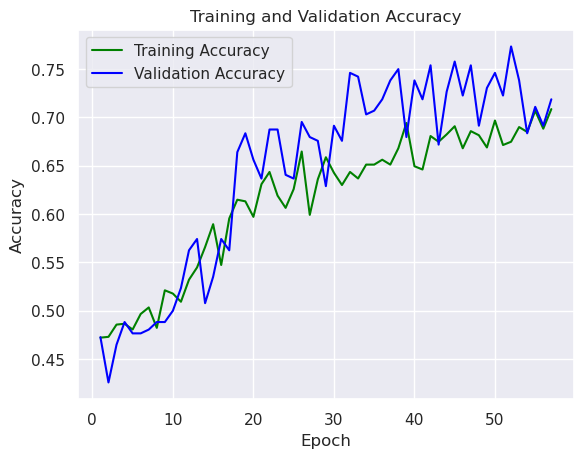

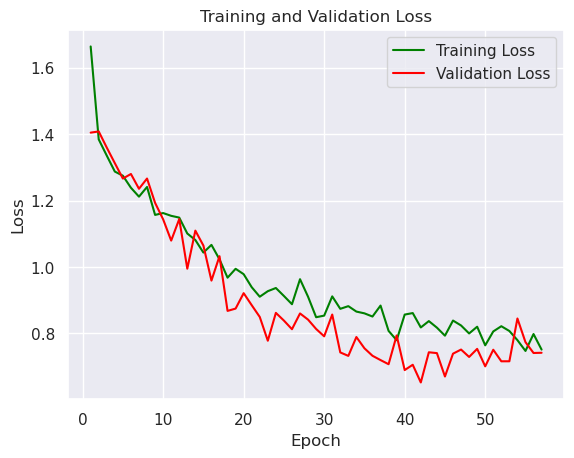

In [35]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)